# Problem Set 4 CS129.18

## Requirements


>Geospatial Analytics is a domain heavily used in corporate and business data science. It's used for demand-forecasting, real-estate prediction, population estimation, and optimal route planning..

Using the lessons on DBSCAN, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What are the top 3 most common convenient store places? ( 1pt )

2. What is the latitude variance and longitude variance, and explain why these variances are different. ( 3pts )

3. Explain what KMeans intertia is and how different it is from DBSCAN epsilon. ( 4pts )

4. Cluster the locations data with DBSCAN. ( 5pts )

5. Present an analysis of the data following the DBSCAN results. ( 7pts )
 - explain what the clusters mean
 - what does the # of clusters tell us
 - what is this information useful for





-----


Bonus 1 : What is your favorite coffee shop? (1pt)


Bonus 2 : Run everything on your own geospatial dataset, and answer the same questions listed above. (5pts)
Use this: https://developer.foursquare.com/docs/resources/categories
 
----

# conda install -c conda-forge folium 


In [52]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import foursquare
import json

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [36]:
#Places include Batangas province cities and municipalities and NCR cities
places = ["13.941876, 121.164421", "14.083507, 121.147354", "13.75, 121.05", \
          "14.083333, 121.183333", "13.933333, 120.928611", "13.865, 121.006389", \
          "13.933333, 120.733333", "14.016667, 121.1", "13.791667, 121.008611", \
          "13.966667, 120.8", "13.832222, 120.632222", "13.916667, 121.05", \
          "13.8175, 121.133056", "14.05, 120.9", "13.916667, 120.883333", \
          "13.65, 121.25", "13.716667, 120.9", "14.041667, 121.158333", \
          "13.966667, 121.083333", "14.066667, 120.633333", "13.883333, 121.216667", \
          "13.883333, 120.933333", "14.1, 121.016667", "13.877222, 121.105", \
         "14.73371, 121.06813", "14.73554, 121.01268", "14.72026, 120.96342", \
          "14.6922, 121.06212", "14.69037, 121.01732", "14.68954, 120.97063", \
          "14.65517, 121.05182", "14.65866, 121.01028", "14.64703, 120.9708", \
          "14.6364, 121.07414", "14.64819, 121.1174", "14.62361, 121.03998", \
          "14.61049, 120.9914", "14.60949, 121.10658", "14.60152, 121.05165", \
          "14.56946, 121.09491", "14.5776, 121.05972", "14.5771, 121.02865", \
          "14.5565, 121.02092", "14.55583, 121.02607", "14.55583, 121.02607", \
          "14.55002, 121.06126", "14.55002, 121.04581", "14.5241, 121.02127", \
          "14.47723, 121.02521", "14.44631, 121.00221", "14.40209, 121.02779",
          "14.40209, 121.02779", "14.60974, 121.08002", "14.64969, 121.0747", \
         "14.1877, 121.1251"]
            
topics = ["7-eleven", "ministop", "convenience store", "minimart", "mart", "alfamart", "family mart", "lawson", "all day"]

In [37]:
# Construct the client object
client = foursquare.Foursquare(client_id='PMMQLMQT5R2MIBC2AOGNTVIYWCKH5RIECIYRD1B1YB455S5T', 
                               client_secret='0XPCUF5W4H5VXSZCDOL1MGDP3NY12ICVBBXBOVA1GM51EHPU', 
                               redirect_uri='http://fondu.com/oauth/authorize')

# Build the authorization url for your app
auth_uri = client.oauth.auth_url()

In [38]:
response = [client.venues.search(params={'query': topic, 
                                         'll': place,
                                        'radius': 3000,
                                        'limit': 30, 
                                        'intent': "browse", 
                                        'categoryId': '4bf58dd8d48988d1f9941735'})
            for place in places for topic in topics]

In [39]:
data_list = []
for x in range(len(response)):
    try:
        for i in range(len(response[x]["venues"])):
            poi_id =  response[x]["venues"][i]["id"]
            poi_name =  response[x]["venues"][i]["name"]
            poi_lat =  response[x]["venues"][i]["location"]["lat"]
            poi_lng =  response[x]["venues"][i]["location"]["lng"]
            data_list.append([poi_id, poi_name, poi_lat, poi_lng])
    except KeyError:
        pass

df = pd.DataFrame(data_list, columns=["id", "name", "lat", "lng"])
df = df.drop_duplicates()
df["name"] = df['name'].str.lower()

In [40]:
df.to_csv("convenience_store.csv")

In [41]:
df.head()

,id,name,lat,lng
0,4e0980fa2271dfa46bbc1e97,jay-r & marie rice store,13.943440,121.160745
1,5b8005f35b971100258fb2b3,alfamart carmel,13.934917,121.158200
2,4f59e081e4b05b5a09ff8988,7-eleven infront of mercado hospital,14.081749,121.151778
3,4fa12f8ee4b0f30726ecff3c,pnp store,14.084684,121.139242
4,500c99f6e4b02a36eacd11df,gema's store :d,14.106054,121.147495


In [42]:
df[df["name"].str.contains("7-eleven")].head()

,id,name,lat,lng
2,4f59e081e4b05b5a09ff8988,7-eleven infront of mercado hospital,14.081749,121.151778
5,4d691c0f82cba093ad60d6d8,7-eleven,14.077182,121.194328
13,56c73fec498eeed0c18ad2b8,7-eleven,14.035181,121.160558
18,4f2e6186e4b0dbffdd36dd78,7-eleven,13.880624,120.915518
19,4cf7a39ac020b60c65692675,7-eleven,13.880504,120.915720


### 1. What are the top 3 most common convenience stores?

<AxesSubplot:title={'center':'Top 20 Convenience Stores by Number of Branches'}>

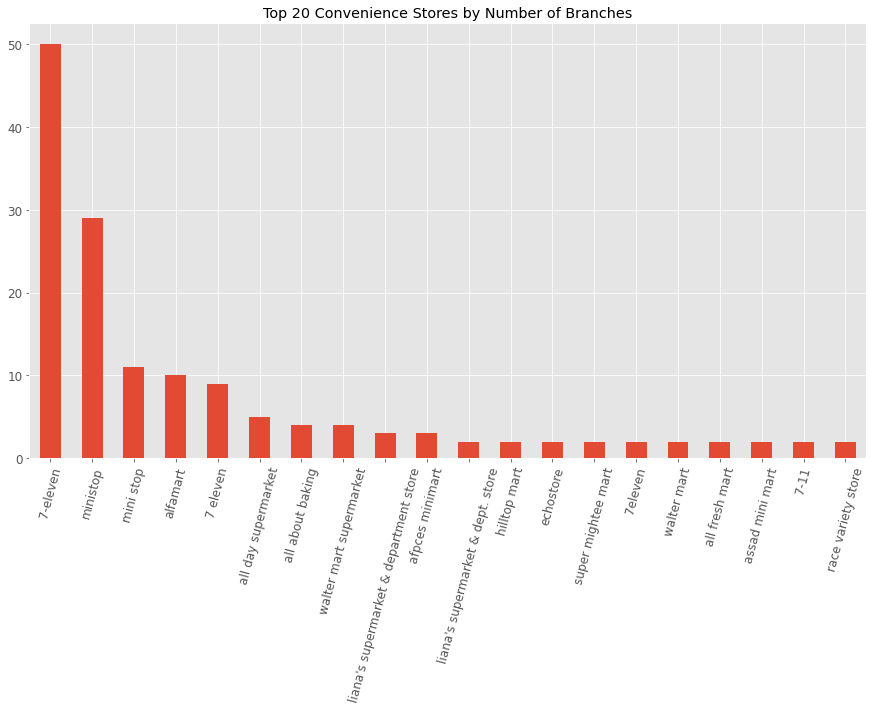

In [43]:
fig, ax = plt.subplots()
df['name'].value_counts().head(20).plot(ax=ax, kind='bar', \
                                        title ="Top 20 Convenience Stores by Number of Branches",figsize=(15,8), fontsize=12, rot=75)

In [44]:
basemap = folium.Map(location=[14.182778,121.1425], tiles="cartodbdark_matter", zoom_start=10)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        popup = folium.Popup(str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
    fill=True).add_to(basemap)

basemap

### 2. What is the latitude variance and longitude variance, and explain why these variances are different. 

In [49]:
stats=pd.DataFrame()
stats["mean"]=df.mean()
stats["Std.Dev"]=df.std()
stats["Var"]=df.var()

In [50]:
stats

,mean,Std.Dev,Var
lat,14.563424,0.140206,0.019658
lng,121.035254,0.046114,0.002127


Variance measures variability from the average or mean. The variances of the latitude and longitude columns are different since when looking at the data geographically, a lot of the data points are dispersed in a more latitudinal way rather than a longitudinal way, hence a greater variation between latitudes than longitudes.

### 3. Explain what KMeans intertia is and how different it is from DBSCAN epsilon

The KMeans inertia is simply the sum of squared distances of data points to their closest cluster centroid using a distance metric (eg. Manhattan distance, Euclidean distance) while a DBSCAN epsilon is the maximum distance between two data points for one to be considered part of the neighborhood of the other.

The main difference between the two is that the inertia is the culmination of all distances measured from all data points to the centroid while a DBSCAN epsilon is not dependent on a centroid rather it is measured from one data point to another possibly neighboring one. The DBSCAN epsilon aids in determining if another neighboring data point is part of the same cluster or not.

### 4. Cluster the locations data with DBSCAN

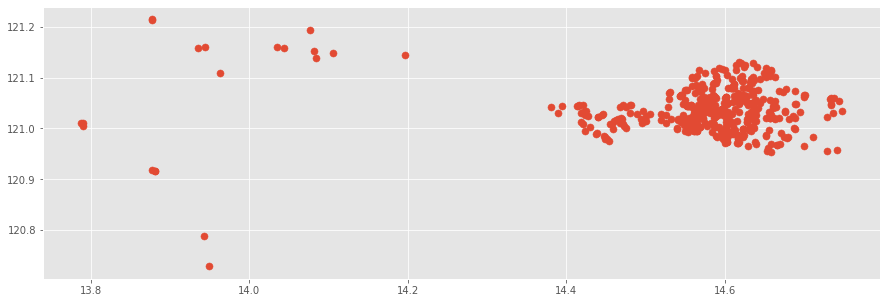

In [51]:
X = np.array(df[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

In [118]:
dbscan = DBSCAN(eps=0.01, min_samples=3).fit(X)
y_dbscan = dbscan.labels_

In [119]:
y_dbscan

array([-1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  2,  2, -1,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1,  4,  3,
        4,  4,  3, -1, -1,  3, -1,  5,  6,  5, -1, -1, -1,  6,  5, -1, -1,
        7,  7,  8,  7,  8,  8,  7,  9, 10, 10,  9,  6,  9,  9,  6,  6,  9,
        6,  6,  9,  9,  9,  9,  9,  6,  6, 10,  9, 10,  9,  9,  9,  6,  9,
        6, 11, 10, 10, -1, -1, -1,  6,  6,  6, 10, 11, 11,  6,  6, -1,  8,
       -1, -1,  8,  8, 11,  8,  9, 12,  9, 12,  9,  9,  9,  9,  9,  9,  9,
        9, 12,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       12,  9,  9, 12,  9,  9, -1,  9, 13,  9,  9,  9,  9, -1,  9,  9,  9,
        9, 13,  9,  9, -1,  9, 11, 10, 11,  9, 10, 10, 11, 11, 11, 10, 11,
       10,  9, 10, 11, 10, 10,  9,  9, 11, 11, 11, 11, 10,  9, 10, 10, 10,
       11, 11,  9,  9, -1, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

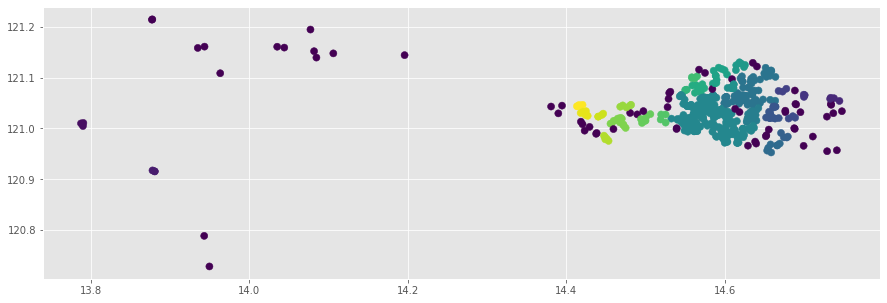

In [120]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')

In [121]:
df["dbscan_cluster"] = y_dbscan
palette = sns.color_palette("pastel", len(y_dbscan)).as_hex()
color_getter = lambda x: palette[int(x)]
df["db_color"] = df["dbscan_cluster"].map(color_getter)
df.head()

,id,name,lat,lng,dbscan_cluster,db_color
0,4e0980fa2271dfa46bbc1e97,jay-r & marie rice store,13.943440,121.160745,-1,#cfcfcf
1,5b8005f35b971100258fb2b3,alfamart carmel,13.934917,121.158200,-1,#cfcfcf
2,4f59e081e4b05b5a09ff8988,7-eleven infront of mercado hospital,14.081749,121.151778,-1,#cfcfcf
3,4fa12f8ee4b0f30726ecff3c,pnp store,14.084684,121.139242,-1,#cfcfcf
4,500c99f6e4b02a36eacd11df,gema's store :d,14.106054,121.147495,-1,#cfcfcf


In [122]:
df_plot = df[df["dbscan_cluster"] > -1]

In [123]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=12)

for index, row in df_plot.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True,
    color =row["db_color"],
    popup = folium.Popup(str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
    fill_color=row["db_color"]).add_to(basemap)
    
basemap

### 5. Present an analysis of the data following the DBSCAN results.
 - explain what the clusters mean
 - what does the # of clusters tell us
 - what is this information useful for

The clusters show different convenient stores in somewhat the same area based on their distances between each other. Since the Batangas area did not have a lot of convenience stores, no cluster was formed. It was observed that since a lot of convenience stores were near to each other, a large portion of the stores located in different parts of Manila were included in the same cluster.

The number of clusters can tell us the number of neighborhoods/zones/areas where there are conveniences stores in close proximity to each other. This can show commercial districts located in Manila and Batangas. It can be observed that as we go farther radially from the densely packed center of Manila, the data points are more spread apart resulting to the formation of different "mini" clusters.

This information can be useful if you are an entrepreneur looking to build/franchise your own convenience store. Based on the results, it can be observed that the Manila area is crowded with convenience stores. Hence, it may be better to start one in the Batangas area, if there is the market for it. However, you can still build a convenience store in Manila which is far from densely populated clusters.

### Bonus 1 : What is your favorite convenience store?

I like Family Mart the best because it serves the best food in my opinion, especially the cinnamon roll and frozen Milo slushee.